<a href="https://colab.research.google.com/github/MehdiMitiche/PyTorch-mnist-mlp-digit-classifier/blob/main/PyTorch_mnist_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio===0.7.0 -f https://download.pytorch.org/whl/torch_stable.html
!pip install numpy
!pip install matplotlib

In [ ]:
import torch
import numpy as np

In [ ]:
#Importing our data
from torchvision import datasets
from torchvision.transforms import transforms

num_workers = 0
batch_size = 20

transform = transforms.ToTensor()

#Train and Test data
train_data = datasets.MNIST(root="data",train=True,download=True,transform=transform)
test_data = datasets.MNIST(root="data",train=False,download=True,transform=transform)

#preparing data loaders
train_loader = torch.utils.data.DataLoader(train_data,batch_size=batch_size,num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data,batch_size=batch_size,num_workers=num_workers)

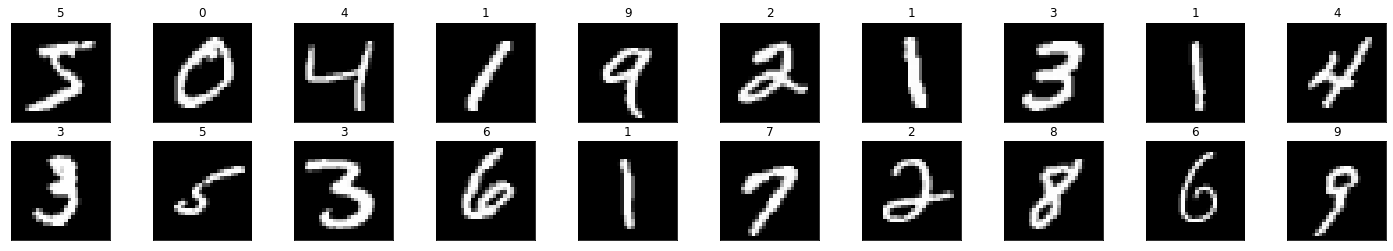

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

#obtain one batch from the training images
dataiter = iter(train_loader)
images,labels = dataiter.next()
images = images.numpy()

#plotting the images 
fig = plt.figure(figsize = (25,4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(images[idx]), cmap='gray')
  ax.set_title(str(labels[idx].item()))

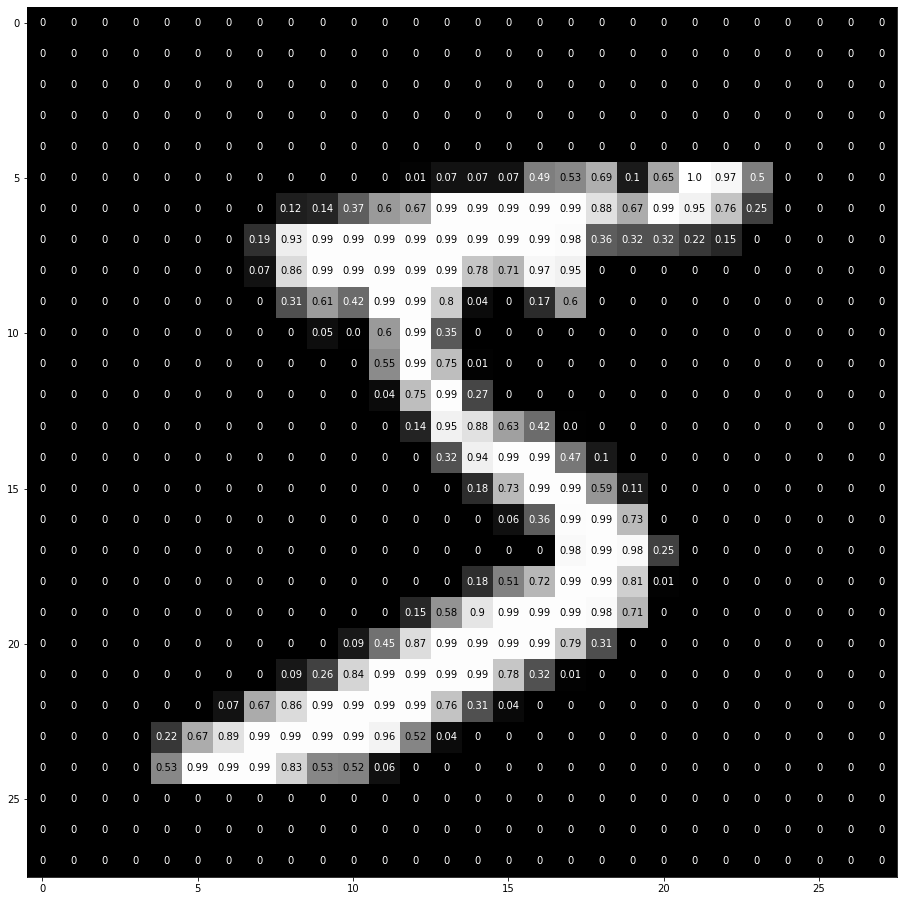

In [49]:
#viewing an image in more detail
img = np.squeeze(images[0])
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
ax.imshow(img,cmap='gray')

width, height = img.shape
thresh = img.max()/2
for x in range(width):
  for y in range(height):
    val = round(img[x][y],2) if img[x][y] != 0 else 0
    ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')


In [70]:
#Defining our neural network
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    #linear layer (784 --> 128)
    self.fc1 = nn.Linear(28*28,128)
    #linear layer (128 --> 64)
    self.fc2 = nn.Linear(128,64)
    #linear layer (64 --> 10)
    self.fc3 = nn.Linear(64,10)
    self.dropout = nn.Dropout(0.2)
  
  def forward(self,x):
    x = x.view(-1,28*28)
    x = F.relu(self.fc1(x))
    x = self.dropout(x)
    x = F.relu(self.fc2(x))
    x = self.dropout(x)
    x = (self.fc3(x))

    return x

#Init the NN
model = Net()
model

Net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [71]:
#The loss and the optimizer
from torch import optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.01)

In [72]:
#training our mmodel 
n_epochs = 20

model.train()

for e in range(n_epochs):
  train_loss = 0
  for images,labels in train_loader:
    #clear the gradiant
    optimizer.zero_grad()
    #forward pass
    output = model(images)
    #calculing the loss
    loss = criterion(output,labels)
    #backward pass
    loss.backward()
    #updating the parameters
    optimizer.step()

    train_loss += loss.item()*images.size(0)
  
  #average loss for epoch
  train_loss = train_loss/len(train_loader.sampler)

  print('Epoch: {} \tTraining Loss: {:.6f}'.format(e+1,train_loss))



Epoch: 1 	Training Loss: 1.012489
Epoch: 2 	Training Loss: 0.405191
Epoch: 3 	Training Loss: 0.314391
Epoch: 4 	Training Loss: 0.262139
Epoch: 5 	Training Loss: 0.223248
Epoch: 6 	Training Loss: 0.199945
Epoch: 7 	Training Loss: 0.177636
Epoch: 8 	Training Loss: 0.165255
Epoch: 9 	Training Loss: 0.152384
Epoch: 10 	Training Loss: 0.139720
Epoch: 11 	Training Loss: 0.133771
Epoch: 12 	Training Loss: 0.126126
Epoch: 13 	Training Loss: 0.117780
Epoch: 14 	Training Loss: 0.110456
Epoch: 15 	Training Loss: 0.106967
Epoch: 16 	Training Loss: 0.103331
Epoch: 17 	Training Loss: 0.098586
Epoch: 18 	Training Loss: 0.095793
Epoch: 19 	Training Loss: 0.091579
Epoch: 20 	Training Loss: 0.085446


In [73]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for *evaluation*

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(len(target)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.073267

Test Accuracy of     0: 99% (972/980)
Test Accuracy of     1: 99% (1125/1135)
Test Accuracy of     2: 97% (1003/1032)
Test Accuracy of     3: 97% (989/1010)
Test Accuracy of     4: 97% (961/982)
Test Accuracy of     5: 97% (871/892)
Test Accuracy of     6: 97% (934/958)
Test Accuracy of     7: 96% (995/1028)
Test Accuracy of     8: 96% (942/974)
Test Accuracy of     9: 97% (981/1009)

Test Accuracy (Overall): 97% (9773/10000)


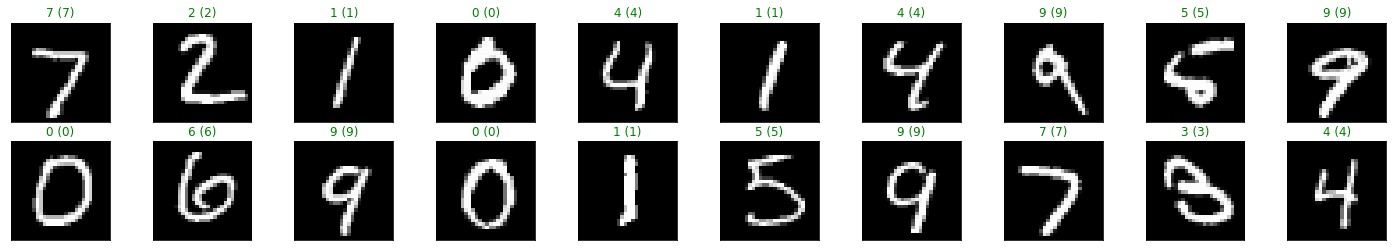

In [74]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))